Shape of X: (442, 10)
Shape of y: (442,)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
First 5 rows of X: [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
First 5 values of y: [151.  75. 141. 206. 135.]
Custom KNN - k=5 | MSE: 3019.08, MAE: 42.77
Sklearn KNN - k=5 | MSE: 3019.08, MAE: 42.77


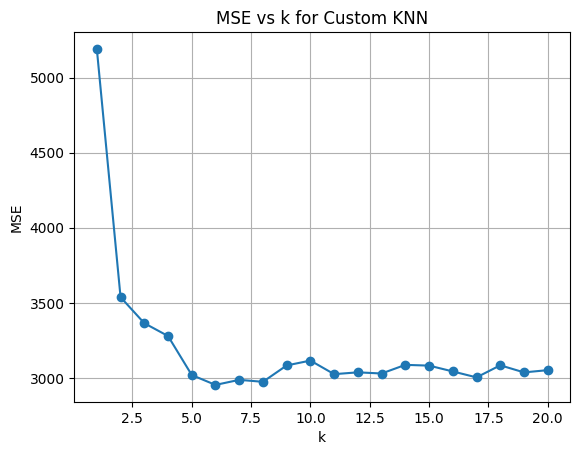

Sklearn KNN with StandardScaler - k=5 | MSE: 3047.45


In [1]:
#### **Làm từng bước thủ công**
#### **KNN Regression Diabetes**

# BAI 1: Load va kham pha du lieu
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

# Load du lieu
data = load_diabetes()
X, y = data.data, data.target
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Feature names:", data.feature_names)

# Hien thi mot vai thuoc tinh va label
print("First 5 rows of X:", X[:5])
print("First 5 values of y:", y[:5])

# BAI 2: Viet ham KNN Regression khong dung sklearn
# Ham tinh khoang cach Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Ham du doan KNN Regression
def knn_regression_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        # Tinh khoang cach tu test_point den tat ca cac diem trong X_train
        distances = [euclidean_distance(test_point, x) for x in X_train]
        # Lay chi so cua k diem gan nhat
        k_indices = np.argsort(distances)[:k]
        # Tinh trung binh y cua k diem gan nhat
        k_nearest_y = y_train[k_indices]
        predictions.append(np.mean(k_nearest_y))
    return np.array(predictions)

# BAI 3: Tach tap train/test va danh gia MAE/MSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Du doan voi ham KNN tu viet tay
k = 5
y_pred_custom = knn_regression_predict(X_train, y_train, X_test, k)

# Tinh MSE va MAE
mse_custom = mean_squared_error(y_test, y_pred_custom)
mae_custom = mean_absolute_error(y_test, y_pred_custom)
print(f"Custom KNN - k={k} | MSE: {mse_custom:.2f}, MAE: {mae_custom:.2f}")

# BAI 4: Nang cao
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 1. So sanh voi KNeighborsRegressor cua sklearn
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred_sklearn = knn_model.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
print(f"Sklearn KNN - k={k} | MSE: {mse_sklearn:.2f}, MAE: {mae_sklearn:.2f}")

# 2. Ve bieu do MSE vs k
k_values = range(1, 21)
mse_list = []
for k_val in k_values:
    y_pred = knn_regression_predict(X_train, y_train, X_test, k_val)
    mse_val = mean_squared_error(y_test, y_pred)
    mse_list.append(mse_val)

plt.plot(k_values, mse_list, marker='o')
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE vs k for Custom KNN")
plt.grid(True)
plt.show()

# 3. Chuan hoa du lieu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Du doan lai voi chuan hoa va sklearn
knn_model_scaled = KNeighborsRegressor(n_neighbors=k)
knn_model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_model_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f"Sklearn KNN with StandardScaler - k={k} | MSE: {mse_scaled:.2f}")